<a href="https://colab.research.google.com/github/AndreaMT05/Bussiness-intelligence/blob/main/Reto_4_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reto #4**

Haremos los 3 modelos (BAYES, Arbol de decisión y Clustering) implementado en el numero de juegos jugados en NBA

0. Cargar las librerias

In [ ]:
import numpy as np #Posee funciones matemáticas
import pandas as pd #Comunicación con el excel
import matplotlib.pyplot as plt
import seaborn as sns


#Se procede con la implementación del modelo

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

#Conectamos con drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Cargamos la base de datos con la variables de entrada y de salida

In [ ]:
nxl='/content/4. BD2_NBA_Data_M_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played']]
threshold = XDB['games_played'].mean()
XDB['games_played_bin'] = (XDB['games_played'] > threshold).astype(int) # Crea una columna que indica si un jugador jugó más o menos que el promedio.

#seleccionar las variables
XD=XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']]
yd=XDB[['games_played_bin']]

XDB.dropna()
display(XDB)


<ipython-input-4-43124262ec4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDB['games_played_bin'] = (XDB['games_played'] > threshold).astype(int) # Crea una columna que indica si un jugador jugó más o menos que el promedio.


,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played,games_played_bin
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,966,1
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1346,1
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1274,1
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1100,1
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1392,1
...,...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,70,0
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,24,0
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,5,0
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,68,0


En las variables encontramos

**Dependiente**

*   Games-played: # de juegos jugados por el jugador en temporada, la variable busca predecir para mirar si se esta o no arriba del promedio.

**Independiente**



*   Salary: Salario del jugador , influye en la cantidad de juegos jugados, pues los jugadores con sueldos altos suelen ser titulares
*   Age: Edad del jugador. Cuando un jugador envejece tiene más probabilidades de lesiones lo que afecta la participación.
*   Height: Altura del jugador, relacionado con la posición en la cacha y cantidad de minutos jugados.
*   Weight: Peso del jugador, puede ayudar a indicar el fisico del jugador y la resistencia
*   games_started: # de juegos en los que ha sido titular el jugador
*   minutes_per_game: promedio de minutos jugados por partido, entre más minutos más probabilidad tiene de jugar.
*   Assists: # total de asistentes en temporada, ayuda a indicar el rol del jugador
*   Blocks: # total de bloqueos en la temporada, se relacionan con la cantidad de minutos jugados.
* steals: # total de robos de balon en temporada, influye en la cantida de juegos que han sido jugados.











In [ ]:
#Se cuenta el número de personas encuestadas
total_respondents = len(XDB)

print(f"Número total de personas que respondieron: {total_respondents}")

Número total de personas que respondieron: 445


2. **Modelo Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

mnb=GaussianNB() #Aloja el modelo
mnb.fit(XD,yd) #Entrena el modelo

#Obtenemos la información del modelo
u=mnb.theta_ #Obtenemos la media de las variables
print("La media de las variables es:\n",u)
var=mnb.var_ #Se calculan las varianzas
print('La varianza de las variables es:\n', var)
sigma=np.sqrt(var) #Se calcula la desviación estándar
print("La desviación estándar de las variables es:\n",sigma)

#Se determinan los límites superiores e inferiores de los datos
LS=u+sigma
LI=u-sigma
print("El límite superior de las variables es:\n",LS)
print("El límite inferior de las variables es:\n",LI)



La media de las variables es:
 [[2.91582743e+06 2.41607843e+01 7.91647059e+01 2.19423529e+02
  6.52352941e+01 1.82878431e+01 1.46941176e+00 3.88627451e-01
  5.98431373e-01]
 [7.42986398e+06 3.04684211e+01 7.92684211e+01 2.24731579e+02
  4.09294737e+02 2.66994737e+01 2.51473684e+00 5.62105263e-01
  8.41578947e-01]]
La varianza de las variables es:
 [[1.15798849e+13 2.73523678e+04 2.73566841e+04 2.80171672e+04
  3.39158480e+04 2.74045416e+04 2.73465659e+04 2.73449991e+04
  2.73449589e+04]
 [3.68265886e+13 2.73570701e+04 2.73564280e+04 2.80246595e+04
  1.10096418e+05 2.73810055e+04 2.73484892e+04 2.73450417e+04
  2.73449657e+04]]
La desviación estándar de las variables es:
 [[3.40292300e+06 1.65385513e+02 1.65398561e+02 1.67383294e+02
  1.84162559e+02 1.65543171e+02 1.65367971e+02 1.65363234e+02
  1.65363112e+02]
 [6.06849146e+06 1.65399728e+02 1.65397787e+02 1.67405674e+02
  3.31807803e+02 1.65472069e+02 1.65373786e+02 1.65363363e+02
  1.65363133e+02]]
El límite superior de las variables

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.1 Evaluar el solicitante

In [ ]:
XDS=[[5000000,37,82,245,45,17.8,0.5,1.4,0.4]]


ydp = mnb.predict(XDS)
print("La predicción del solicitante es:\n", ydp)

if ydp == 1:
  print("El jugador está por encima del promedio")

if ydp == 0:
  print("El jugador está por debajo del promedio")


La predicción del solicitante es:
 [0]
El jugador está por debajo del promedio


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix

#Hacemos un barrido de los datos
ydp2=mnb.predict(XD) #hacemos el pronóstico para todos los datos base
cm=confusion_matrix(yd,ydp2) #crea la matriz de confusión
print("La matriz de confusión es: \n",cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]


Ex=(VP+VN)/(VP+VN+FP+FN)
print("La exactitud del modelo es: \n",Ex)
#todas las métricas que me den por encima del 75% es bueno.

#tasa de error: mal funcionamiento o error del modelo
TE=(FP+FN)/(VP+VN+FP+FN)
print("La tasa de error del modelo es: \n",TE)

SE=VP/(VP+FN) #Sensibilidad
print('La sensibilidad del modelo es:\n',SE)

SP=VN/(VN+FP) #Especificidad
print('La especificidad del modelo es:\n',SP)

PR=VP/(VP+FP) #Precisión
print('La precisión del modelo es:\n',PR)

PRNeng=VN/(VN+FN) #Precisión Negativa
print('La precisión negativa del modelo es:\n',PRNeng)

La matriz de confusión es: 
 [[236  19]
 [ 76 114]]
La exactitud del modelo es: 
 0.7865168539325843
La tasa de error del modelo es: 
 0.21348314606741572
La sensibilidad del modelo es:
 0.6
La especificidad del modelo es:
 0.9254901960784314
La precisión del modelo es:
 0.8571428571428571
La precisión negativa del modelo es:
 0.7564102564102564


2.2
**Analisis de datos**
Se evidencia como con el modelo de Bayes esta por encima del promedio. Para esto se tomaron las variables salario, edad, estatura, peso, juegos iniciados, minutos por partido, asistencia, bloqueos y robos.

Con el modelo se llego a una exactitud de 78,65% lo que demuestra un desempeño bueno y aceptable ya que lo muestra arriba del promedio. La precisión del modelo fue de 85.71% es decir que los jugadores estan por encima del promedio. La sensibilidad esta en el 60% demuestar una mayor dificultad en la identificación de jugadores por encima del promedio. La especificidad fue del 92.55% demuestra la clasificación de jugadores que juegan menos del promedio. En general, el modelo Bayes es muy bueno, identifica facilmente los jugadores con menos participación en juegos pero se le dificulta en la detección de los que juegan más partidos.

3. **Arbol de decisión**

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd)

#se procede con la gráfica
from pydotplus import graph_from_dot_data #me crea la gráfica
from sklearn.tree import export_graphviz #me exporta a png, jpg, tiff

ve= ['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']
dot_data=export_graphviz(mar,feature_names=ve)
graph_from_dot_data(dot_data).write_png('2. ArbolDeDecisión_Parcial.png')

True

In [ ]:
XDB0=pd.read_excel(nxl, sheet_name=0)
XDB0.head(100)

XD0=XDB0[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']]

threshold = XDB0['games_played'].mean() # Calculate threshold from XDB0
XDB0['games_played_bin'] = (XDB0['games_played'] > threshold).astype(int)
YD0=XDB0[['games_played_bin']]

# Instead of looking for NaN values which likely don't exist,
# select rows where 'games_played_bin' is 0 (below average)
# This assumes you want to predict for those players.
# Adjust the condition if you intend to predict for a different group
filas = XDB0.index[XDB0['games_played_bin'] == 0].tolist()

XD0=np.array(XD0)
XD0=XD0[filas]


y_pred=mar.predict(XD0)
print(y_pred)

#se crea el informe en excel
df=pd.DataFrame(np.column_stack((filas, XD0,y_pred)))



df.columns=['player_index','salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played_bin']
df.to_excel("Evaluación games played.xlsx")


[0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


3.1 Evaluación del modelo

In [ ]:
ydp=mar.predict(XD) #pronóstico sobre la bd original
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]


#Métricas de desempeño
EX=(VP+VN)/(VP+VN+FP+FN) #Exactitud
print('La exactitud del modelo es:\n',EX)

TE=(FN+FP)/(VP+VN+FP+FN) #Tasa de error:
print('La tasa de error del modelo es:\n',TE)

SE=VP/(VP+FN) #Sensibilidad
print('La sensibilidad del modelo es:\n',SE)

SP=VN/(VN+FP) #Especificidad
print('La especificidad del modelo es:\n',SP)

PR=VP/(VP+FP) #Precisión
print('La precisión del modelo es:\n',PR)

PRNeng=VN/(VN+FN) #Precisión Negativa
print('La precisión negativa del modelo es:\n',PRNeng)

La matriz de confusión es:
 [[247   8]
 [ 12 178]]
La exactitud del modelo es:
 0.9550561797752809
La tasa de error del modelo es:
 0.0449438202247191
La sensibilidad del modelo es:
 0.9368421052631579
La especificidad del modelo es:
 0.9686274509803922
La precisión del modelo es:
 0.956989247311828
La precisión negativa del modelo es:
 0.9536679536679536


3.2
**Analisis de datos**
Se evidencia la utilización de arboles de decisión para determinar el # de juegos jugados por los jugadores de la NBA que esta por encima del promedio. Aqui se consideraron las mismas variables.

El modelo alcanzo una exactitud del 95.5%, lo que indica un buen desempeño en la clasificacion de jugadores. La precisión del modelo fue del 95.69%, lo que significa un alto porcentaje en los jugadores por encima del promedio. Además, la sensibilidad del modelo fue del 93.68%, lo que demuestra que el modelo tiene una gran capacidad para identificar correctamente a los jugadores que efectivamente juegan más del promedio. La especificidad se mantuvo en 96.86%, lo que indica que el modelo también clasifica con precisión a los jugadores que juegan menos del promedio.

Con los datos que encontramos se observa que este modelo supero a el modelo de Naive Bayes, pues su exactitud, precisión, sensibilidad fueron mejores, además, la tasa de error fue solo de 4.49%


4. **Clustering**

In [ ]:
XD= XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played_bin']]
display(XD)

,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played_bin
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,1
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1
...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,0
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,0
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,0
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,0


In [ ]:
#Para mirar correlaciones y variables importantes

sns.pairplot(XDB, hue='games_played_bin',size=6, vars=['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals'])


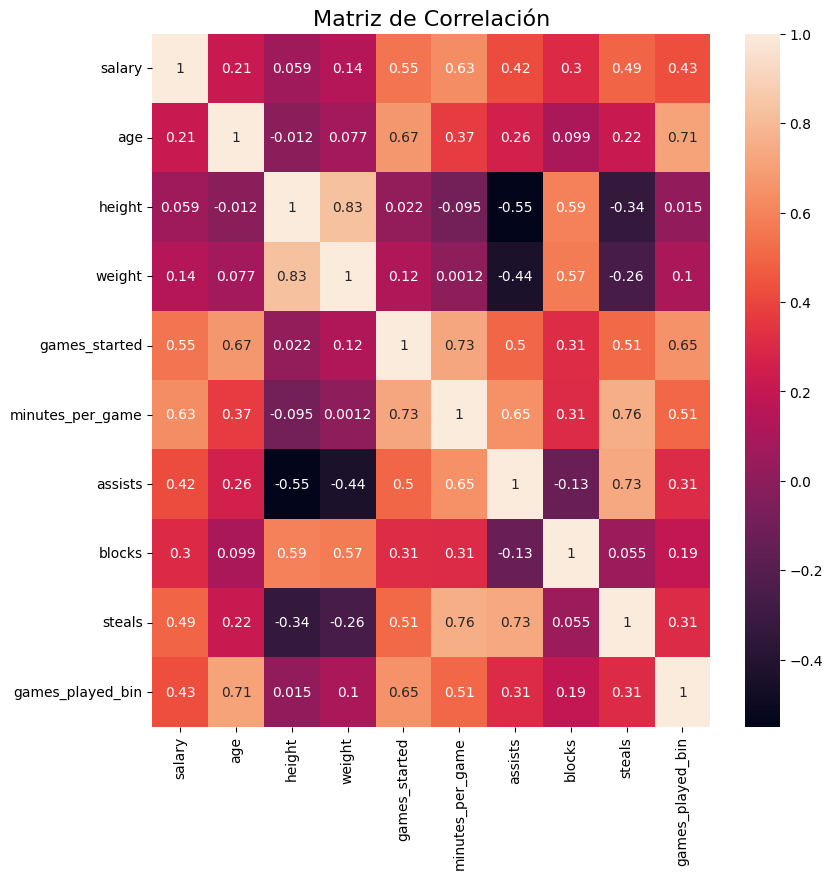

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(XD.corr(), annot=True)
plt.title("Matriz de Correlación", fontsize=16)  # Aumenta tamaño del título
plt.show()

**Variables con correlación mas alta con "games_played_bin"**

* Age(0.71) Correlación positiva con la variable de salida, los jugadores con mas experiencia tienden a jugar más partidos
* Games_started (0.65) → El número de juegos iniciados está fuertemente relacionado con los partidos jugados. Es lógico que quienes inician más partidos acumulen más juegos en la temporada.
* Games_per_game (0.51) → También presenta una correlación importante, ya que el tiempo promedio jugado en cada partido influye en la acumulación de juegos totales.
* Steals (0.31) → El número de robos tiene una correlación moderada con la cantidad de juegos jugados, lo que sugiere que jugadores más activos en defensa tienden a jugar más.
* Salary (0.43) → Aunque no es la variable más fuerte, el salario tiene cierta relación con los minutos y partidos jugados, lo que indica que los jugadores mejor pagados suelen tener más tiempo en cancha.

In [ ]:
XD1 = XD [['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']]
yd1 = XD[['games_played_bin']]


#Se van a crear cinco montoncitos de datos (perfiles de créditos)
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=5,,random_state=42)
mkm.fit(XD,yd)
centroids=mkm.cluster_centers_
print("Los centroides son :\n", centroids)

#Como quedaron clasificadas las personas
labels=mkm.labels_
XDB['labels']=labels #Adicione a la tabla el cluster al que pertenece un solicitante
display(XDB)

#Caracterizamos los centroides
ND=np.bincount(labels)
print("El tamaño de los clusters es :\n",ND)
NApr=XDB.groupby('labels').agg({'games_played_bin':lambda x:(x==1).sum()})
NNeg=XDB.groupby('labels').agg({'games_played_bin':lambda x:(x==0).sum()})
print("El número de personas con enfermedad cardiaca por cluster es:\n",NApr)
print("El número de personas sin enfermedad cardiaca por cluster es:\n",NNeg)

#Se procede con la estimación de los porcentajes de preaprobación
NApr['games_played_bin']=NApr['games_played_bin']/ND
NNeg['games_played_bin']=NNeg['games_played_bin']/ND
print("El número de jugadores por encima del promedio por cluster es:\n",NApr)
print("El número de jugadores por debajo del promedio por cluster es:\n",NNeg)


Los centroides son :
 [[1.41802870e+07 2.73333333e+01 7.93555556e+01 2.27022222e+02
  3.99488889e+02 2.99444444e+01 3.19555556e+00 6.80000000e-01
  1.06888889e+00 6.88888889e-01]
 [4.04441022e+06 2.75309735e+01 7.95044248e+01 2.23787611e+02
  2.05345133e+02 2.34663717e+01 1.86902655e+00 4.92035398e-01
  7.00884956e-01 4.77876106e-01]
 [8.36209753e+06 2.86140351e+01 7.87894737e+01 2.20438596e+02
  3.64789474e+02 2.72526316e+01 2.56666667e+00 5.10526316e-01
  8.84210526e-01 7.54385965e-01]
 [1.16961665e+06 2.56869159e+01 7.90420561e+01 2.18565421e+02
  1.00037383e+02 1.69682243e+01 1.36308411e+00 3.51401869e-01
  5.46261682e-01 2.14953271e-01]
 [2.08213350e+07 3.00625000e+01 8.04375000e+01 2.38125000e+02
  6.88687500e+02 3.45312500e+01 3.71875000e+00 9.62500000e-01
  1.11875000e+00 1.00000000e+00]]


,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played,games_played_bin,labels
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,966,1,3
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1346,1,4
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1274,1,1
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1100,1,1
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1392,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,70,0,3
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,24,0,3
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,5,0,3
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,68,0,1


El tamaño de los clusters es :
 [ 45 113  57 214  16]
El número de personas con enfermedad cardiaca por cluster es:
         games_played_bin
labels                  
0                     31
1                     54
2                     43
3                     46
4                     16
El número de personas sin enfermedad cardiaca por cluster es:
         games_played_bin
labels                  
0                     14
1                     59
2                     14
3                    168
4                      0
El número de jugadores por encima del promedio por cluster es:
         games_played_bin
labels                  
0               0.688889
1               0.477876
2               0.754386
3               0.214953
4               1.000000
El número de jugadores por debajo del promedio por cluster es:
         games_played_bin
labels                  
0               0.311111
1               0.522124
2               0.245614
3               0.785047
4               0

4.1 se evalua el modelo

In [ ]:
ydp=np.zeros((len(XD),1))
Vab=np.array(NApr);Vneg=np.array(NNeg)

for k in range(len(XD)):
 napr=labels[k]

 print("La persona tal:", k)
 print("El cluster al que pertenece", napr)
 print("El porcentaje de aprobación es:",Vab[napr])
 print("El porcentaje de negación es:", Vneg[napr])
 #Me muestra el cluster al que pertenece cada persona



 #consolidamos la informacion de los aprobados y negados

 if Vab[napr]>Vneg[napr]:
    ydp[k]=1
 else:
    ydp[k]=0



La persona tal: 0
El cluster al que pertenece 3
El porcentaje de aprobación es: [0.21495327]
El porcentaje de negación es: [0.78504673]
La persona tal: 1
El cluster al que pertenece 4
El porcentaje de aprobación es: [1.]
El porcentaje de negación es: [0.]
La persona tal: 2
El cluster al que pertenece 1
El porcentaje de aprobación es: [0.47787611]
El porcentaje de negación es: [0.52212389]
La persona tal: 3
El cluster al que pertenece 1
El porcentaje de aprobación es: [0.47787611]
El porcentaje de negación es: [0.52212389]
La persona tal: 4
El cluster al que pertenece 1
El porcentaje de aprobación es: [0.47787611]
El porcentaje de negación es: [0.52212389]
La persona tal: 5
El cluster al que pertenece 2
El porcentaje de aprobación es: [0.75438596]
El porcentaje de negación es: [0.24561404]
La persona tal: 6
El cluster al que pertenece 1
El porcentaje de aprobación es: [0.47787611]
El porcentaje de negación es: [0.52212389]
La persona tal: 7
El cluster al que pertenece 3
El porcentaje de

In [ ]:
#Se evalúa el modelo
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)
VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]
#Métricas de desempeño
EX=(VP+VN)/(VP+VN+FP+FN) #Exactitud
print('La exactitud del modelo es:\n',EX)

TE=(FN+FP)/(VP+VN+FP+FN) #Tasa de error:
print('La tasa de error del modelo es:\n',TE)

SE=VP/(VP+FN) #Sensibilidad
print('La sensibilidad del modelo es:\n',SE)

SP=VN/(VN+FP) #Especificidad
print('La especificidad del modelo es:\n',SP)

PR=VP/(VP+FP) #Precisión
print('La precisión del modelo es:\n',PR)

PRNeng=VN/(VN+FN) #Precisión Negativa
print('La precisión negativa del modelo es:\n',PRNeng)


La matriz de confusión es:
 [[227  28]
 [100  90]]
La exactitud del modelo es:
 0.7123595505617978
La tasa de error del modelo es:
 0.2876404494382023
La sensibilidad del modelo es:
 0.47368421052631576
La especificidad del modelo es:
 0.8901960784313725
La precisión del modelo es:
 0.7627118644067796
La precisión negativa del modelo es:
 0.6941896024464832


4.2 **Analisis de datos**

Para este modelo se utilizaron las mismas variables para buscar el mismo objetivo.

Para este modelo hubo una diferencia en la exactitud, pues te fue de 71.24%, lo que indica un rendimiento moderado en la clasificación de jugadores con juegos jugados por encima del promedio. La precisión del modelo fue del 76.27%, lo que significa que, de los jugadores identificados por encima del promedio,27% realmente lo están.Sin embargo, la sensibilidad del modelo fue del 47.37%, lo que sugiere que el modelo tiene dificultades para identificar correctamente a los jugadores que efectivamente juegan más del promedio. Asimismo, la especificidad alcanzó un 89.02%, lo que indica que el modelo es mucho más efectivo para clasificar correctamente a los jugadores que juegan menos del promedio.

Si se observa el modelo de clustering se puede decir que es más conservadora ya que pro¿ioriza la clasificacion de jugadores con menos juegos, pero esta tiene una alta tasa de falsos negativos, es decir, no logra captar bien a los jugadores que realmente deberían estar en la categoría de los jugadores con más juegos jugados.

Podemos decir entonces que el modelo de árboles de decisión es mucho más preciso, ya que ofrece la mayor exactitud (95.5%) y una alta capacidad para identificar correctamente tanto jugadores que juegan más como menos del promedio. Por otro lado el modelo de Naive Bayes tiene un desempeño intermedio entre los otros dos modelos, pues tiene un buen balance entre precisión y sensibilidad, pero con una menor capacidad para detectar jugadores con más juegos jugados la sensibilidad del 72.4%. Como bien dije, el modelo de clustering muestra el rendimiento más bajo, especialmente en la detección de jugadores por encima del promedio, siendo la sensibilidad del 47.37%, lo que sugiere que no es la mejor opción para este problema de clasificación.

4.3 Se evalua a la persona

In [ ]:
XDn=([5000000,37,82,245,45,17.8,0.5,1.4,0.4, 1]) # Add a value for 'games_played_bin'
ydn=mkm.predict([XDn])
print("La persona pertenece al cluster:\n", mkm.predict([XDn]))
print("La probabilidd de que la persona esté por encima del promedio:\n", Vab[ydn])
print("La probabilidd de que la persona esté por debajo del promedio:\n", Vneg[ydn])

La persona pertenece al cluster:
 [1]
La probabilidd de que la persona esté por encima del promedio:
 [[0.47787611]]
La probabilidd de que la persona esté por debajo del promedio:
 [[0.52212389]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree

def get_rule(tree, feature_names, class_names, node_index=0):
  """
  Returns the decision rule for a given node in the decision tree.

  Args:
    tree: The trained decision tree model.
    feature_names: List of feature names used in the model.
    class_names: List of class names (e.g., ['below average', 'above average']).
    node_index: The index of the node to get the rule for.

  Returns:
    A string representing the decision rule for the node.
  """
  tree_ = tree.tree_
  feature_id = tree_.feature[node_index]

  if feature_id != _tree.TREE_UNDEFINED:
    name = feature_names[feature_id]
    threshold = tree_.threshold[node_index]
    rule = f"{name} <= {threshold:.2f}"

    left_rule = get_rule(tree, feature_names, class_names, tree_.children_left[node_index])
    right_rule = get_rule(tree, feature_names, class_names, tree_.children_right[node_index])

    if left_rule and right_rule:
      rule = f"if {rule} then ({left_rule}) else ({right_rule})"
    elif left_rule:
      rule = f"if {rule} then ({left_rule})"
    elif right_rule:
      rule = f"if not {rule} then ({right_rule})"

    return rule
  else:
    # Leaf node
    class_probs = tree_.value[node_index][0]
    class_index = np.argmax(class_probs)
    class_name = class_names[class_index]
    prob = class_probs[class_index] / np.sum(class_probs)
    return f"{class_name} (probability: {prob:.2f})"

# Assuming 'mar' is your trained DecisionTreeClassifier and 'XD' your dataframe:
feature_names = XD.columns[:-1]  # Exclude 'games_played_bin'
class_names = ['below average', 'above average']  # Replace with your actual class names

# Get the rule for the root node (node_index=0)
rule = get_rule(mar, feature_names, class_names)
print(f"Decision Rule: {rule}")

# To predict for a specific athlete (using XDn from your previous example):
athlete_data = [5000000, 37, 82, 245, 45, 17.8, 0.5, 1.4, 0.4]
prediction = mar.predict([athlete_data])[0]
probability = mar.predict_proba([athlete_data])[0][prediction]

print(f"Athlete Prediction: {class_names[prediction]}")
print(f"Probability: {probability:.2f}")

Decision Rule: if age <= 26.50 then (if games_started <= 320.00 then (if salary <= 6888459.50 then (if weight <= 276.50 then (below average (probability: 0.99)) else (below average (probability: 0.67))) else (if assists <= 1.35 then (above average (probability: 1.00)) else (below average (probability: 0.95)))) else (if salary <= 6290392.00 then (below average (probability: 1.00)) else (if minutes_per_game <= 27.70 then (below average (probability: 1.00)) else (above average (probability: 1.00))))) else (if games_started <= 84.00 then (if games_started <= 38.00 then (if age <= 31.50 then (below average (probability: 1.00)) else (below average (probability: 0.50))) else (if assists <= 0.65 then (above average (probability: 0.83)) else (below average (probability: 0.65)))) else (if games_started <= 269.50 then (if steals <= 0.95 then (above average (probability: 0.88)) else (below average (probability: 0.83))) else (if age <= 27.50 then (above average (probability: 0.92)) else (above aver

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
